# Descriptive Plots

This notebook produces some plots that describe the collected PubMed dataset. 

## Output

See the `outputs/descriptive_plots/` folder.

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('notebook')

from python.cogtext.utils import select_relevant_journals
from python.cogtext.abstract_utils import remove_short_abstracts

ERROR: Abstract preprocessing pipeline requires gensim v4.0 or later


In [ ]:
# Parameters
OUTPUT_FOLDER = Path('outputs/descriptive_plots/')

In [7]:
# discover short abstracts which are assumed to be incorrect

PUBMED = pd.read_csv(
  'data/pubmed_abstracts_preprocessed.csv.gz'
).pipe(select_relevant_journals).dropna(subset=['abstract']).pipe(remove_short_abstracts)

## PubMed corpus size plots

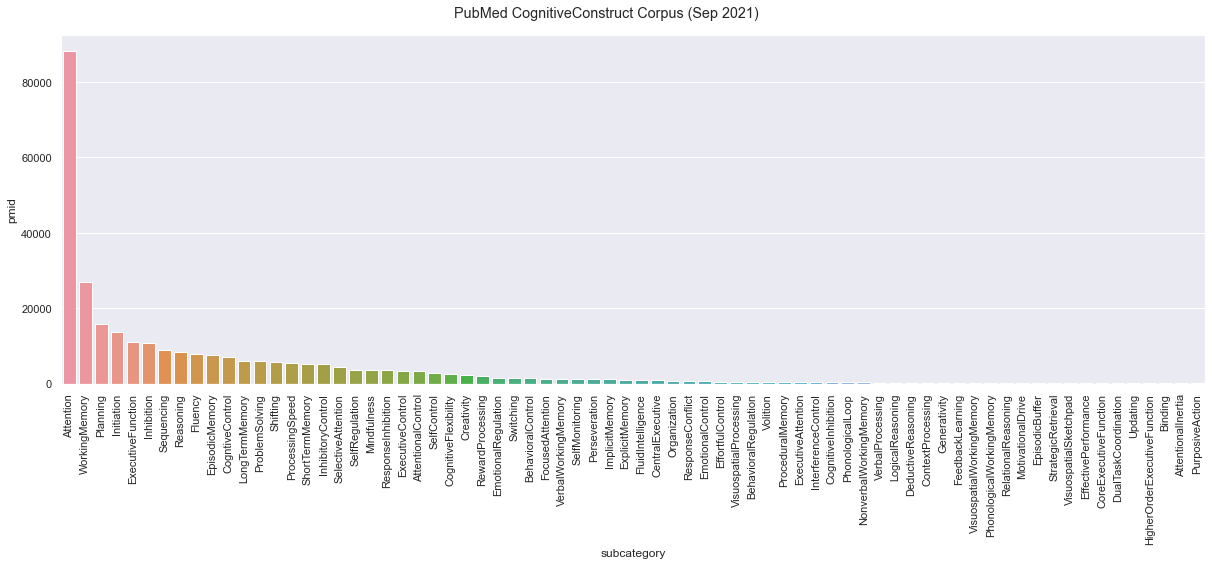

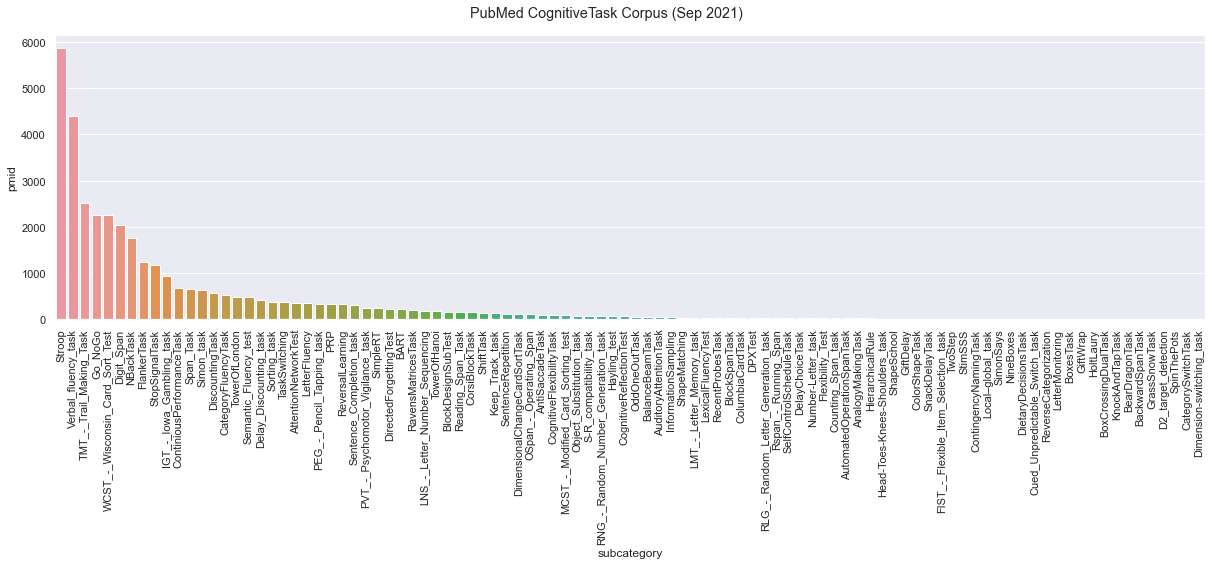

In [137]:
for cat in PUBMED['category'].unique():
  _, ax = plt.subplots(figsize=(.1 * PUBMED['subcategory'].nunique(), 8))

  cnt = PUBMED.query(
    'category == @cat'
  )[['subcategory','pmid']].groupby(['subcategory']).nunique().reset_index()
  sns.barplot(
    data=cnt.sort_values('pmid',ascending=False),
    x='subcategory', y='pmid',
    dodge=False,
    ax=ax)
  plt.setp(ax.get_xticklabels(), rotation=90)
  plt.suptitle(f'PubMed {cat} Corpus (Sep 2021)')
  plt.tight_layout()
  plt.savefig(OUTPUT_FOLDER / f'1_{cat.lower().replace("cognitive","")}_corpus_size.png')
  plt.show()

In [1]:
# TODO: ontology structure

from pathlib import Path
import networkx as nx

G = nx.drawing.nx_pydot.read_dot(Path('~/Desktop/x.dot').expanduser())

nx.draw(G)

import matplotlib.pyplot as plt
plt.savefig('outputs/descriptive_plots/efo.png')

ModuleNotFoundError: No module named 'networkx'